<a href="https://colab.research.google.com/github/barikbin/Graph-Neural-Networks/blob/main/Plot_different_graph_types_Graph_NN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot Graphs

In [3]:
#   with this function we draw the graph, pay attension to the arguments taken!

def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels = False, node_size = node_size, edge_color = 'gray', arrowsize = 30)

# This part doesnt make too much sense!
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    # with this syntax we draw labels on the nodes!    
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20) 


# Here we have a major condition for the plot-weight
# Also we change the labels based on the weight!
# Pay attention to the coordinated as well!

    if plot_weight:
       pos_attrs = {}
       for node, coords in pos_nodes.items():
           pos_attrs[node] = (coords[0], coords[1] + 0.08)

# Also we change the labels based on the weight!
       nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)  

       edege_labels = dict([((a,b,), d["weight"]) for a,b,d in G.edges(data=True)])         
       nx.draw_networkx_labels(G, pos_nodes, edege_labels = edge_labels)

    plt.axis('off')
    axis = plt.gca()

    # Here the syntax is mainly related to the axis limit!
    axis.set_xlim([1.2 * x for x in axis.get_xlim()])
    axis.set_ylim({1.2 * y for y in axis.get_ylim()})
    #nx.draw(G)


# Creating Undirected Graphs

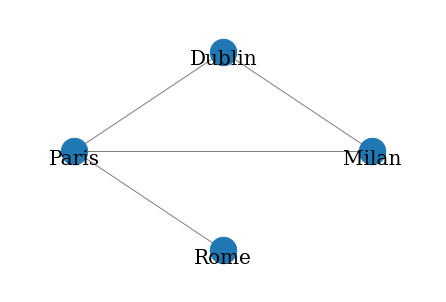

In [15]:

import numpy as  np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
# This means the edeges!
E = [('Milan', 'Dublin'),('Milan', 'Paris'), ('Paris', 'Dublin'), ('Paris', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes= nx.shell_layout(G), node_size=700)




In [16]:

print(f"v ={G.nodes}")
print(f"E ={G.edges}")


v =['Paris', 'Dublin', 'Milan', 'Rome']
E =[('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Rome'), ('Dublin', 'Milan')]


In [17]:

{G.degree(v): v for v in G.nodes}


{3: 'Paris', 2: 'Milan', 1: 'Rome'}

In [18]:

print(f"Graph Oorder: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Nieghbors for nodes: { { v: list(G.neighbors(v)) for v in G.nodes} }")




Graph Oorder: 4
Graph Size: 4
Degree for nodes: {'Paris': 3, 'Dublin': 2, 'Milan': 2, 'Rome': 1}
Nieghbors for nodes: {'Paris': ['Milan', 'Dublin', 'Rome'], 'Dublin': ['Milan', 'Paris'], 'Milan': ['Dublin', 'Paris'], 'Rome': ['Paris']}


In [19]:

ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")


Nodes: ['Paris', 'Dublin', 'Milan']
Edges: [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Dublin', 'Milan')]


In [20]:
# Here we added new nodes and edges!

new_nodes = {'London', 'Madrid'}
new_edges = [('London', 'Rome'), ('Madrid', 'Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")


V = ['Paris', 'Dublin', 'Milan', 'Rome', 'London', 'Madrid']
E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Rome'), ('Paris', 'Madrid'), ('Dublin', 'Milan'), ('Rome', 'London')]


In [21]:
# Now we want to remove nodes and edges

node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f" E = {G.edges} ")


V = ['Paris', 'Dublin', 'Milan', 'Rome']
 E = [('Paris', 'Milan'), ('Paris', 'Dublin'), ('Paris', 'Rome'), ('Dublin', 'Milan')] 


In [22]:
# Now we want to remove edges

node_edges = [('Milan', 'Dublin'), ('Milan', 'Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")


V = ['Paris', 'Dublin', 'Milan', 'Rome']
E = [('Paris', 'Dublin'), ('Paris', 'Rome')]


In [23]:
# Here we want to have the edge list!

print(nx.to_edgelist(G))


[('Paris', 'Dublin', {}), ('Paris', 'Rome', {})]


In [25]:
# Here we want to find the adjacency

print(nx.to_pandas_adjacency)


<function to_pandas_adjacency at 0x7feb3254a160>


# Creating a directed Graph

In [1]:

import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)

# This shows the neighboring edges!
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))


  source  target
0  Paris   Milan
1  Paris  Dublin
2  Milan  Dublin
3  Milan    Rome
        Dublin  Paris  Rome  Milan
Dublin     0.0    0.0   0.0    0.0
Paris      1.0    0.0   0.0    1.0
Rome       0.0    0.0   0.0    0.0
Milan      1.0    0.0   1.0    0.0


In [2]:

print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes  } }")
print(f"Outdegree for the nodes: { {v: G.out_degree(v) for v in G.nodes } }")


Indegree for nodes: {'Dublin': 2, 'Paris': 0, 'Rome': 1, 'Milan': 1}
Outdegree for the nodes: {'Dublin': 0, 'Paris': 2, 'Rome': 0, 'Milan': 2}


In [6]:
from matplotlib import pyplot as plt


def draw_graph(G, pos_nodes, node_names ={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='yellow', arrowsize=30)

    # pay attention to the pos_nodes argument!
    pos_attrs = {}

    # pay attention to the coords argument!    
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)

    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)

        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20) 

        #pay attention to this edge labels syntax
        edge_labels = dict([((a,b), d["weight"]) for a,b,d in G.edges(data=True)]) 
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels= edge_labels)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2 * x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])



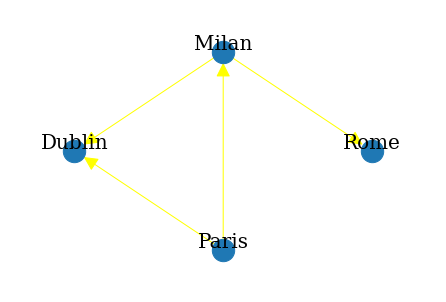

In [7]:
draw_graph(G, pos_nodes = nx.shell_layout(G), node_size= 500)


# Creating Weighted Directed Graph

  source  target  weight
0  Paris   Milan       8
1  Paris  Dublin      11
2  Milan  Dublin      19
3  Milan    Rome       5
        Dublin  Paris  Rome  Milan
Dublin     0.0    0.0   0.0    0.0
Paris     11.0    0.0   0.0    8.0
Rome       0.0    0.0   0.0    0.0
Milan     19.0    0.0   5.0    0.0


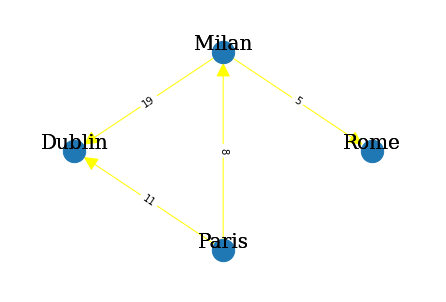

In [8]:

import networkx as nx
Gg = nx.MultiDiGraph()
V = {'Paris', 'Dublin', 'Milan', 'Rome'}
E = [('Paris', 'Dublin', 11), ('Paris', 'Milan', 8), ('Milan', 'Rome', 5), ('Milan', 'Dublin', 19)]

G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

# This is a beauty!

# Bipartitie Graph

In [13]:

import numpy as np
import pandas as pd

n_nodes = 10
n_edges = 12

# Pay attention to the one line if!
# This is for even

bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 == 0]

# this is for odds
top_nodes = [ith for ith in range(n_nodes) if ith % 2 == 1]

# we need this down below to draw dataframe! united iteration for the dataframe creation

iter_edges = zip(np.random.choice(bottom_nodes, n_edges), np.random.choice(top_nodes, n_edges))

edges = pd.DataFrame([ {"source":a, "target":b} for a , b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite =0)
B.add_nodes_from(top_nodes, bipartite=1)

# Pay attentio to this syntax!
# This should be tuple!
# we iteratre with tupe through the dataFrame

B.add_edges_from(tuple(x) for x in edges.values)



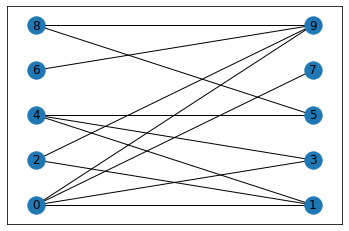

In [15]:

import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.algorithms import bipartite


pos = nx.bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)


# Creating Multi Graph

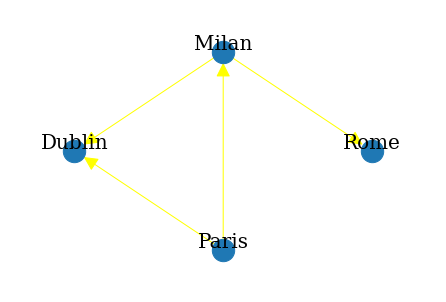

In [16]:

import networkx as nx 
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan', 'Dublin'), ('Milan', 'Dublin'), ('Paris', 'Milan'), ('Paris', 'Dublin'), ('Milan', 'Rome'), ('Milan', 'Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)
